In [6]:
from PIL import Image

# 카메라 모션 제어 마우스 컨트롤

In [5]:
import cv2
import numpy as np
import HandTrackingModule as htm
import time
import autopy

wCam, hCam = 1280, 720
frameR = 100 # Frame Reduction
smoothening = 7

plocX, plocY = 0, 0
clocX, clocY = 0, 0

cap = cv2.VideoCapture(0)
cap.set(3, wCam)
cap.set(4, hCam)

detector = htm.handDetector(maxHands=1)
wScr, hScr = autopy.screen.size()

while True:
    # 1. Find hand Landmarks
    success, img = cap.read()
    img = detector.findHands(img)
    lmList, bbox = detector.findPosition(img)
    
    # 2. Get the tip of the index and middle fingers
    if len(lmList) != 0:
        x1, y1 = lmList[8][1:]
        x2, y2 = lmList[12][1:]
        # print(x1, y1, x2, y2) # x,y 좌표 값
        
        # 3. Check which fingers are up
        fingers = detector.fingersUp()
        # print(fingers) # 손가락이 몇 개 접혔는지 출력값 (오른손 기준)
        
        cv2.rectangle(img, (frameR, frameR), (wCam - frameR, hCam - frameR),
        (200, 0, 200), 2) # 포인트 감지 프레임 설정
        
        # 4. Only Index Finger : Moving Mode
        if fingers[1] == 1 and fingers[2] == 0: # 검지는 펴져있고 중지는 접혀있을 때

            # 5. Convert Coordinates
            x3 = np.interp(x1, (frameR, wCam - frameR), (0, wScr))
            y3 = np.interp(y1, (frameR, hCam - frameR), (0, hScr))
            
            # 6. Smoothen Values
            clocX = plocX + (x3 - plocX) / smoothening
            clocY = plocY + (y3 - plocY) / smoothening
    
            # 7. Move Mouse
            autopy.mouse.move(wScr - clocX, clocY) # wScr - x3 으로 방향을 바꿈
            cv2.circle(img, (x1, y1), 15, (255, 0, 255), cv2.FILLED) # 검지 점 크기 확대
            plocX, plocY = clocX, clocY
            
        # 8. Both Index and middle fingers are up : Clicking Mode
        if fingers[1] == 1 and fingers[2] == 1: # 검지와 중지가 펴져있을 때
            # 9. Find distance between fingers
            length, img, lineInfo = detector.findDistance(8, 12, img)
            #print(length) # 검지와 중지의 거리
            
            # 10. Click mouse if distance short
            if length < 71: # 검지와 중지의 거리가 71이하가 된다면 초록색 점으로 나타나고 클릭한다.
                cv2.circle(img, (lineInfo[4], lineInfo[5]),15, (0, 255, 0), cv2.FILLED)
                autopy.mouse.click()
            
    cv2.imshow("Image", img)
    key = cv2.waitKey(1)
    
    if key & 0xFF == ord('q') or key == 27:
            cv2.destroyAllWindows()
            break

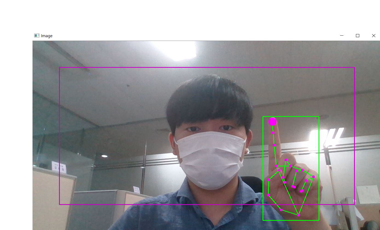

In [7]:
image1 = Image.open("images\image1.JPG")
image1 = image1.resize((380, 230))
image1

검지손가락으로 마우스 포인트를 움직인다.

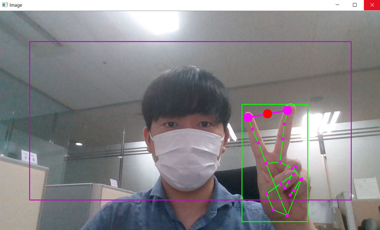

In [8]:
image1 = Image.open("images\image2.JPG")
image1 = image1.resize((380, 230))
image1

검지와 중지를 넓게 펼치면 마우스 포인터가 정지된다.

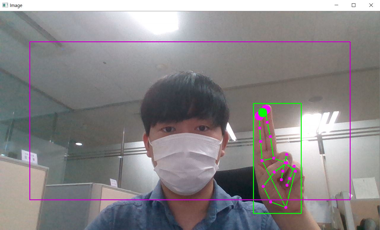

In [9]:
image1 = Image.open("images\image3.JPG")
image1 = image1.resize((380, 230))
image1

검지와 중지를 붙이면 마우스 포인터가 클릭된다.